In [2]:
# pip install imbalanced-learn as imblearn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [8]:
import math

In [8]:
cancer_df = pd.read_csv('risk_factors_cervical_cancer.csv')
print(cancer_df)

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0          

In [7]:
cancer_df.head()

NameError: name 'cancer_df' is not defined

In [10]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

Starting the data process. Filling the missing values based on the type of the data. Removing the columns which has most of the missing data. 

In [6]:
## dropping two columns of STDs as it does not give much information because of missing data

cancer_df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

NameError: name 'cancer_df' is not defined

In [19]:
cancer_df.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [12]:
cancer_df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [21]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

In [13]:
cancer_df = cancer_df.replace('?', np.NaN)

In [23]:
### Filling the missing values of numeric data columns with mean of the column data.
# for feature in numerical_df:
#     print(feature,'',cancer_df[feature].convert_objects(convert_numeric=True).mean())
#     feature_mean = round(cancer_df[feature].convert_objects(convert_numeric=True).mean(),1)
#     cancer_df[feature] = cancer_df[feature].fillna(feature_mean)
# Filling the missing values of numeric data columns with mean of the column data.
for feature in numerical_df:
    print(feature, '', pd.to_numeric(cancer_df[feature], errors='coerce').mean())
    feature_mean = round(pd.to_numeric(cancer_df[feature], errors='coerce').mean(), 1)
    cancer_df[feature] = pd.to_numeric(cancer_df[feature], errors='coerce').fillna(feature_mean)


   

Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.219721412585799
Smokes (packs/year)  0.4531439506492308
Hormonal Contraceptives (years)  2.2564192013893334
IUD (years)  0.5148043184885289
STDs (number)  0.17662682602921648


In [24]:
# for feature in categorical_df:
    
#     cancer_df[feature] = cancer_df[feature].convert_objects(convert_numeric=True).fillna(1.0)
for feature in categorical_df:
    cancer_df[feature] = pd.to_numeric(cancer_df[feature], errors='coerce').fillna(1.0)


In [25]:
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [26]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\s

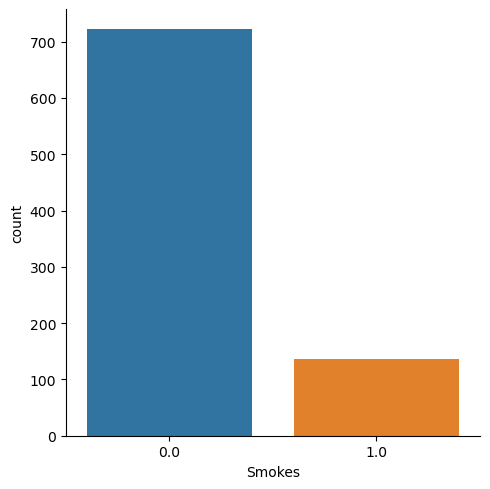

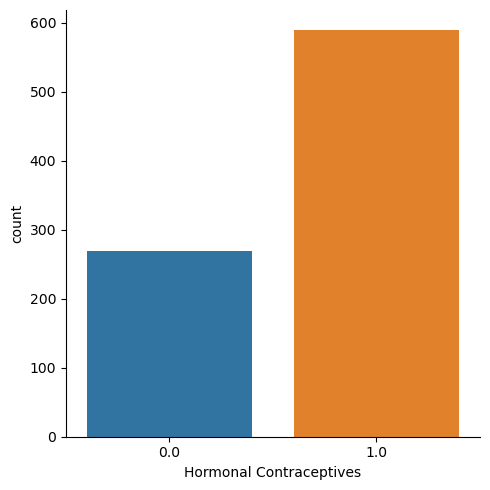

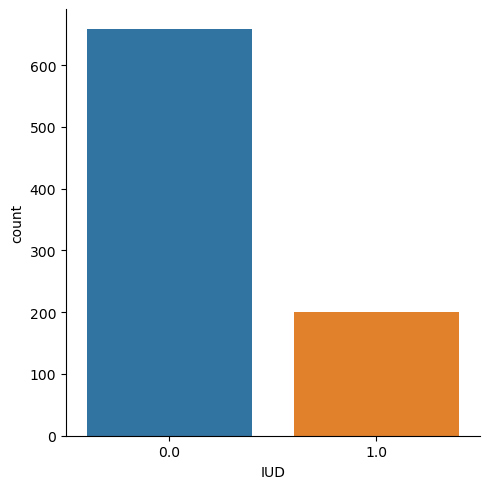

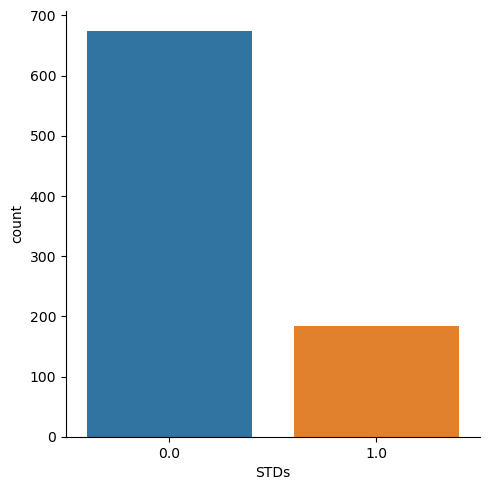

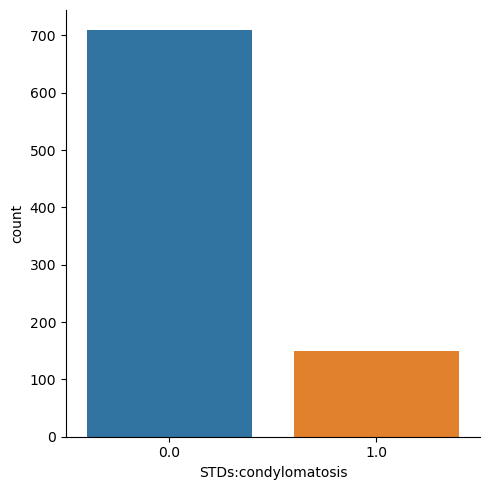

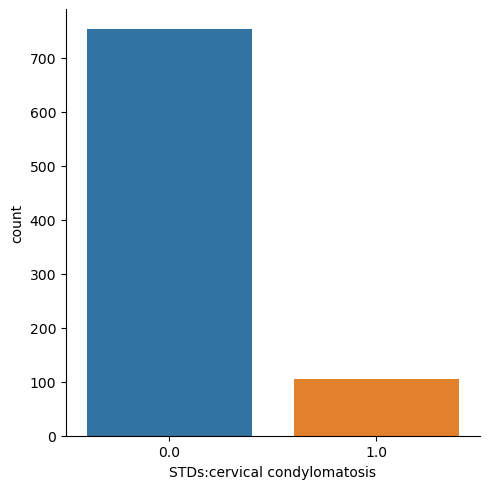

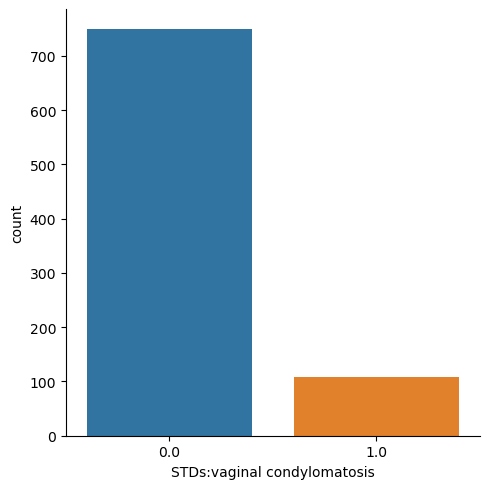

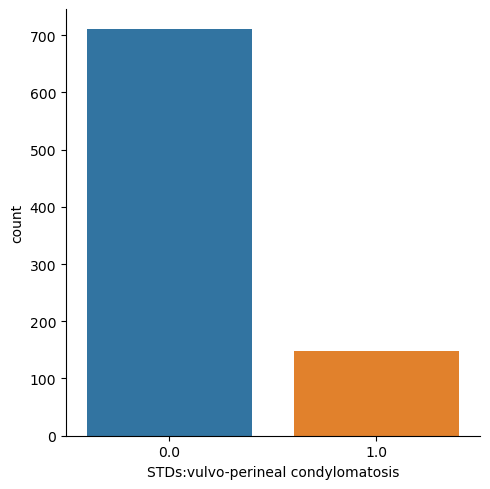

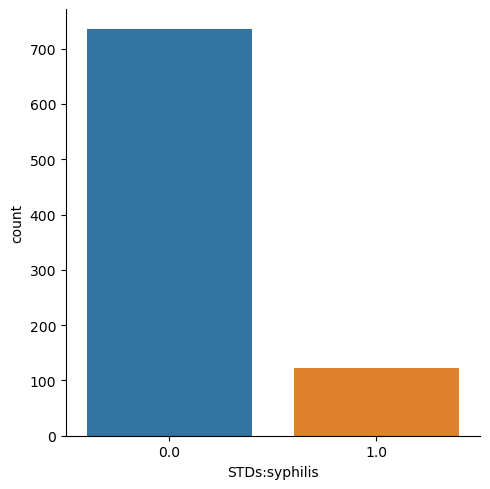

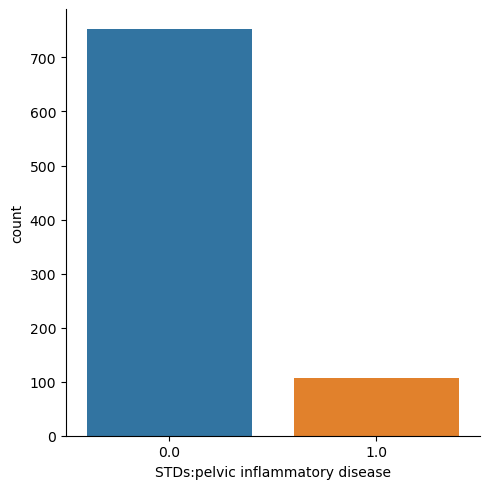

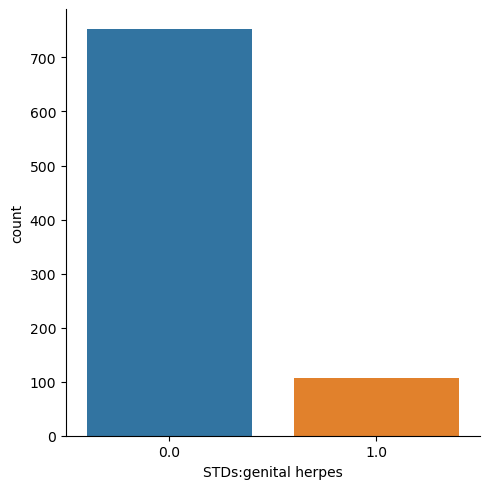

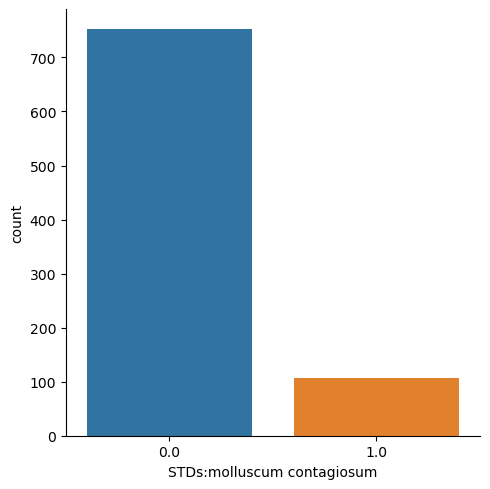

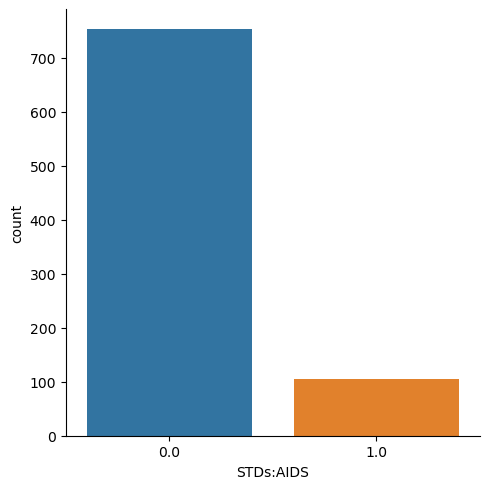

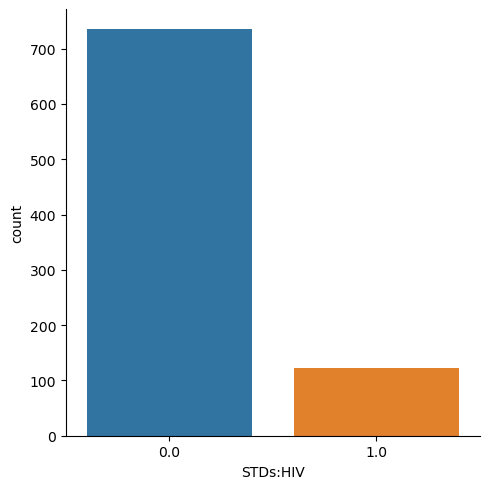

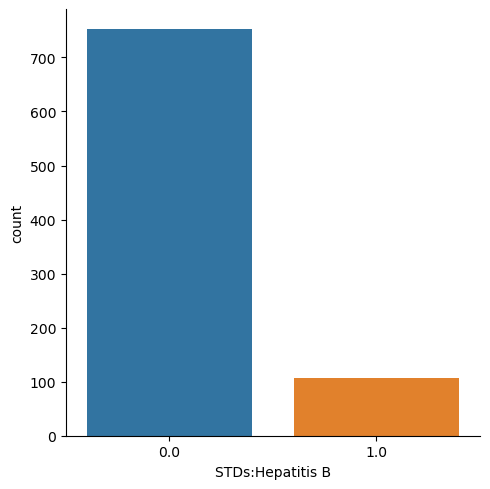

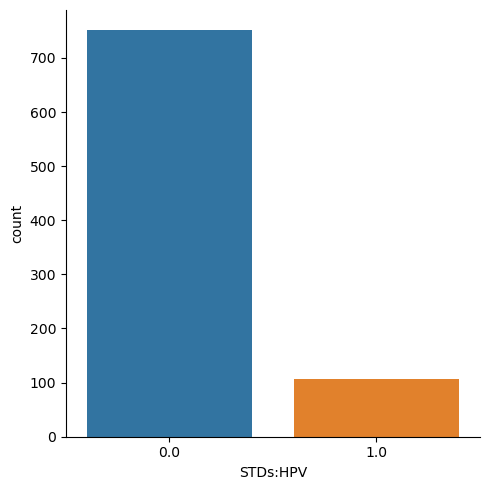

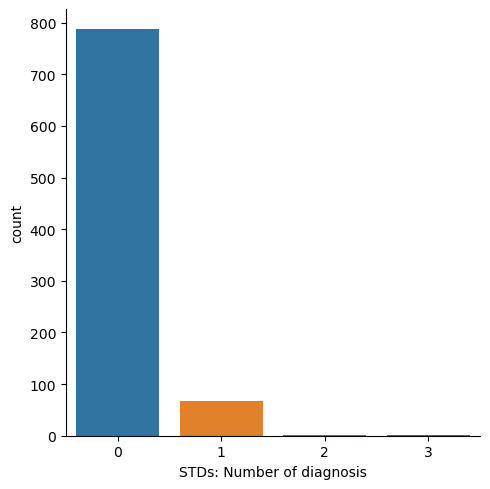

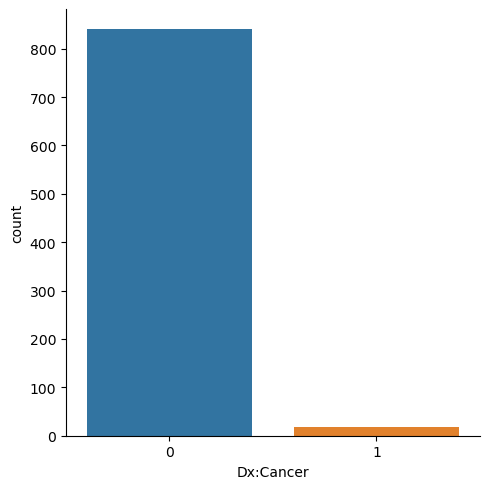

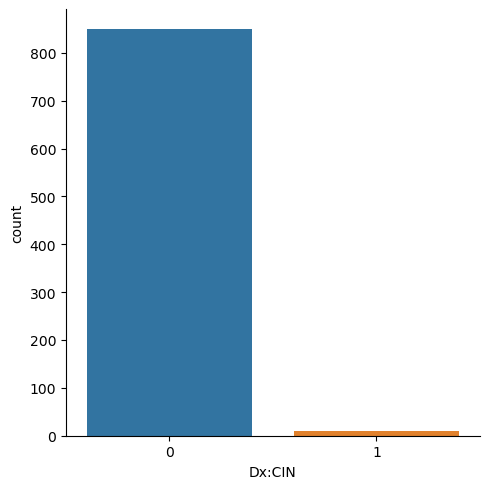

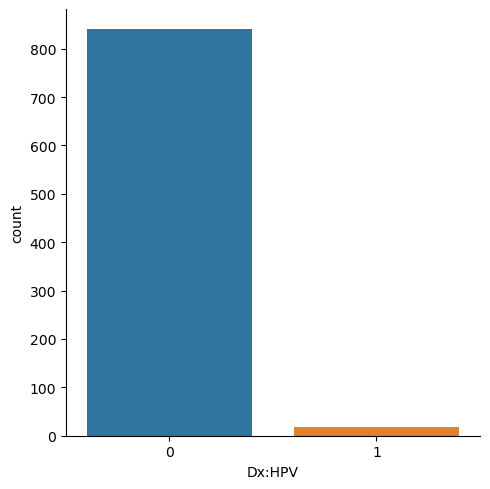

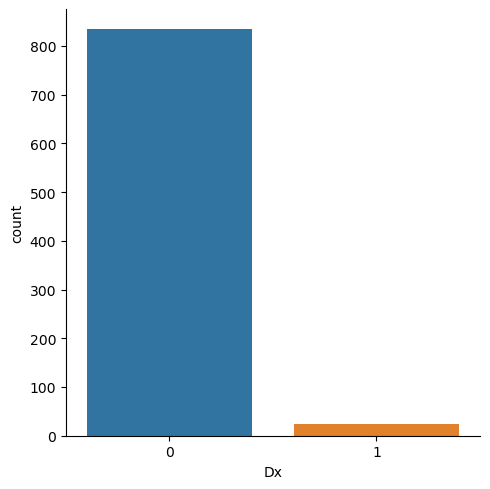

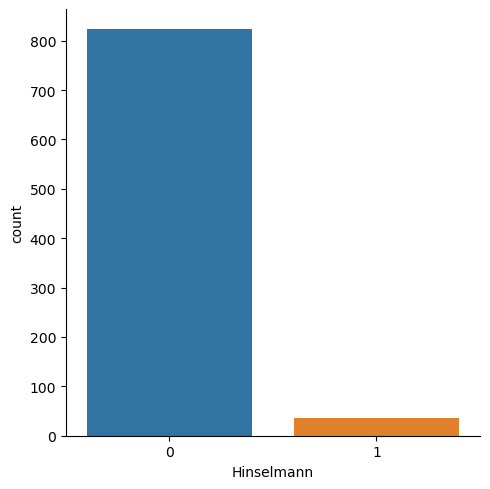

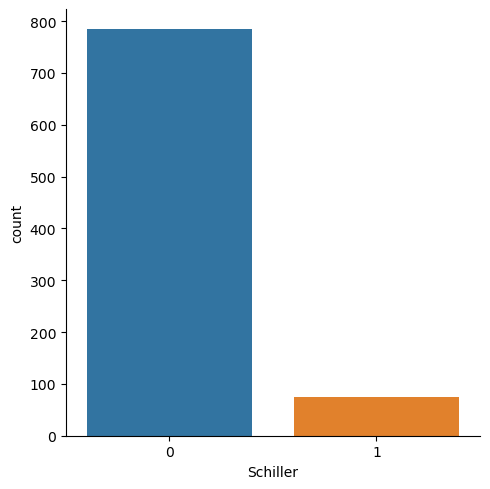

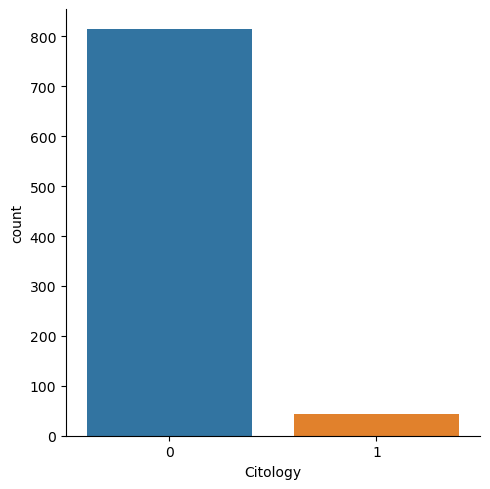

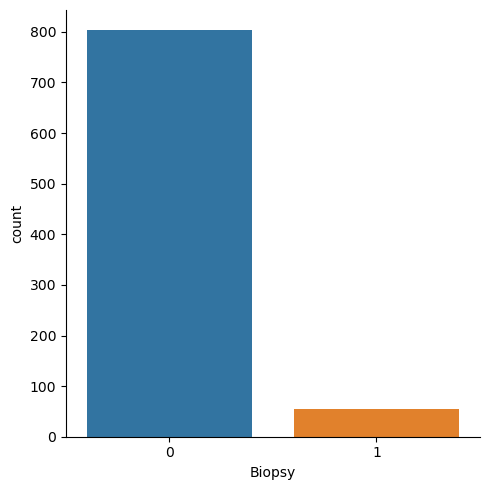

In [30]:
for feature in categorical_df:
   sns.catplot(x=feature,data=cancer_df,kind='count')



From the above graphs it can be seen that Harmonal Contraceptive column has the highest number of one's which indicate that this might be the important key feature in detecting the cervical cancer. So let us concentrate on this feature more in future analysis.

In [31]:
g = sns.PairGrid(cancer_df,
                 y_vars=['Hormonal Contraceptives'],
                 x_vars= category_df,
                 aspect=.75, size=3.5)
g.map(sns.barplot, palette="pastel");

TypeError: PairGrid.__init__() got an unexpected keyword argument 'size'

In [32]:
# cancer_df['Number of sexual partners'] = round(cancer_df['Number of sexual partners'].convert_objects(convert_numeric=True))
# cancer_df['First sexual intercourse'] = cancer_df['First sexual intercourse'].convert_objects(convert_numeric=True)
# cancer_df['Num of pregnancies']=round(cancer_df['Num of pregnancies'].convert_objects(convert_numeric=True))
# cancer_df['Smokes'] = cancer_df['Smokes'].convert_objects(convert_numeric=True)
# cancer_df['Smokes (years)'] = cancer_df['Smokes (years)'].convert_objects(convert_numeric=True)
# cancer_df['Hormonal Contraceptives'] = cancer_df['Hormonal Contraceptives'].convert_objects(convert_numeric=True)
# cancer_df['Hormonal Contraceptives (years)'] = cancer_df['Hormonal Contraceptives (years)'].convert_objects(convert_numeric=True)
# cancer_df['IUD (years)'] = cancer_df['IUD (years)'].convert_objects(convert_numeric=True)
cancer_df['Number of sexual partners'] = round(pd.to_numeric(cancer_df['Number of sexual partners'], errors='coerce'))
cancer_df['First sexual intercourse'] = pd.to_numeric(cancer_df['First sexual intercourse'], errors='coerce')
cancer_df['Num of pregnancies'] = round(pd.to_numeric(cancer_df['Num of pregnancies'], errors='coerce'))
cancer_df['Smokes'] = pd.to_numeric(cancer_df['Smokes'], errors='coerce')
cancer_df['Smokes (years)'] = pd.to_numeric(cancer_df['Smokes (years)'], errors='coerce')


print('minimum:',min(cancer_df['Hormonal Contraceptives (years)']))
print('maximum:',max(cancer_df['Hormonal Contraceptives (years)']))

minimum: 0.0
maximum: 30.0


From the above plots, it can be seen that With the use of Harmonal contraceptives, Hinselmann test positive.

Mean age of the Women facing the risk of Cervical cancer 26.82051282051282


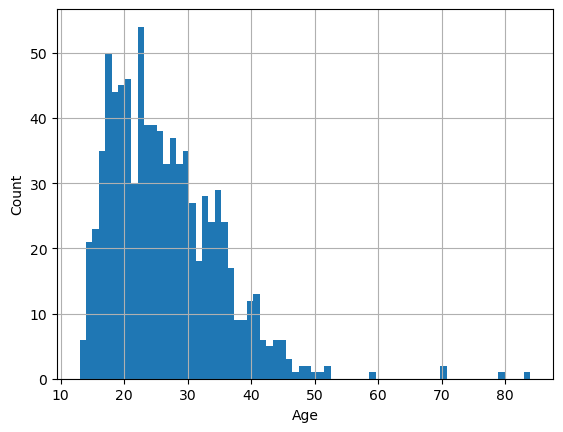

In [33]:
cancer_df['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Count')
print('Mean age of the Women facing the risk of Cervical cancer',cancer_df['Age'].mean())

C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.p

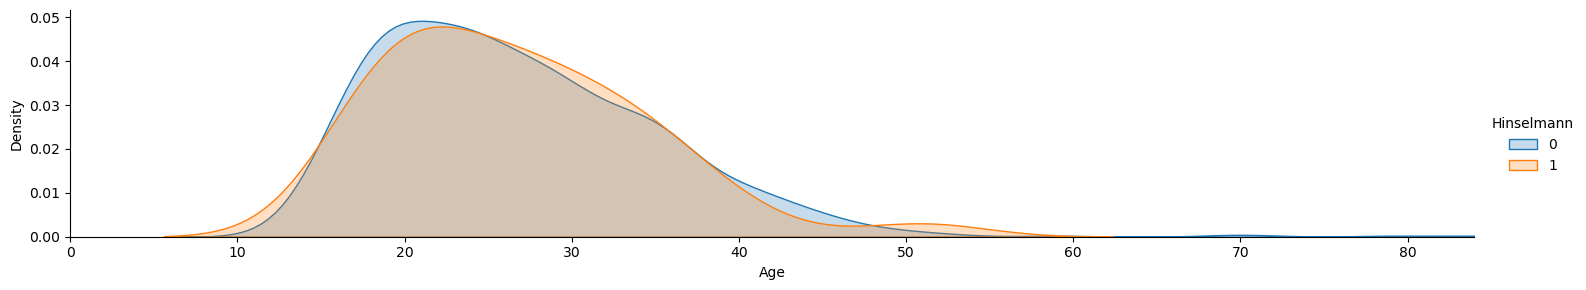

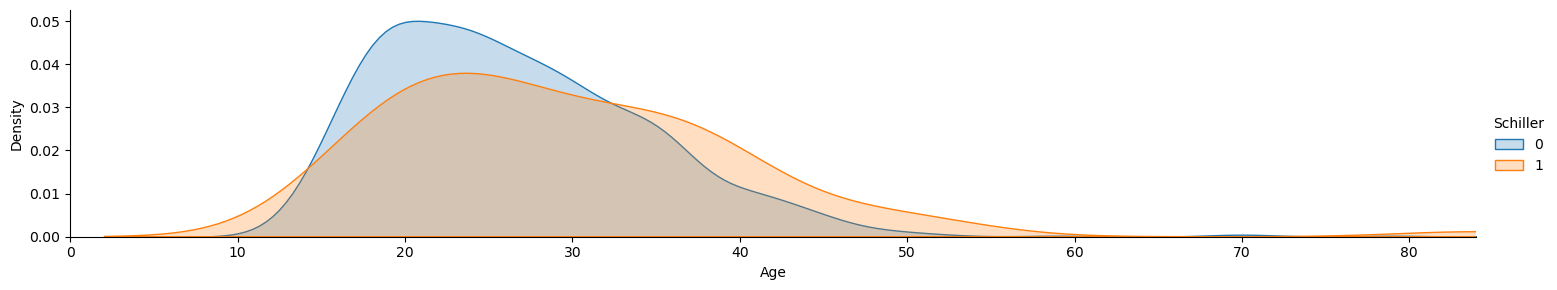

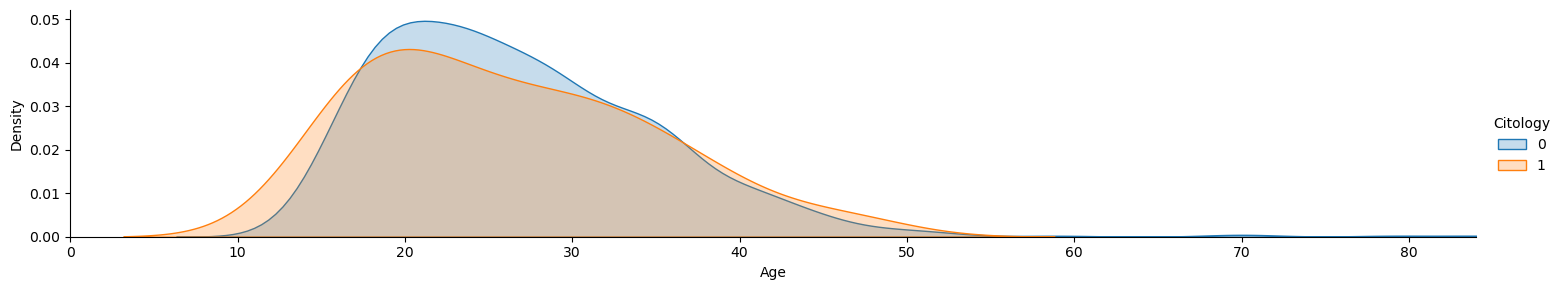

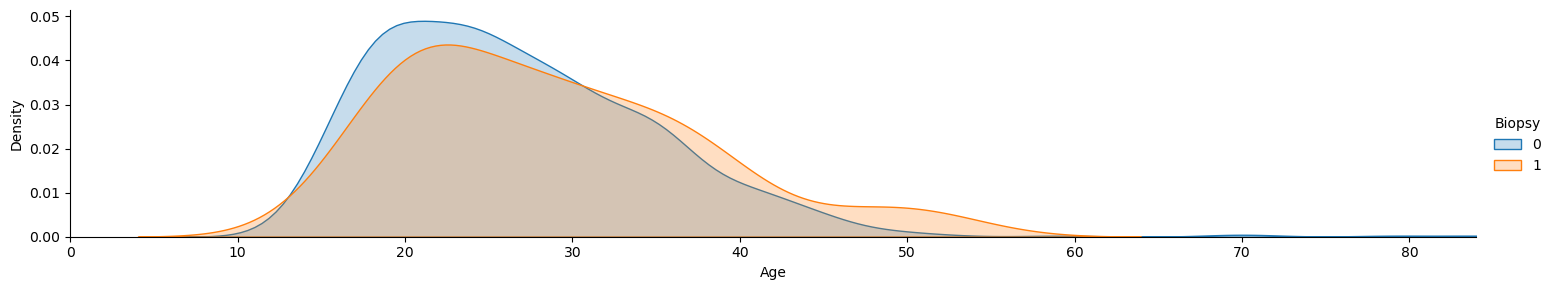

In [34]:
for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'Age',shade=True)

 oldest = cancer_df['Age'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

From the above plots it can be seen that the mean age of the women facing the risk of cervicakl cancer is 26. Also the women with the age in range of 20 to 35 have the highest chances of developing the risk of cervical cancer. The peaks at age of 50 and the furthur extension of the density plot indicate that some of the women face the risk of cervical cancer even at that age.

C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


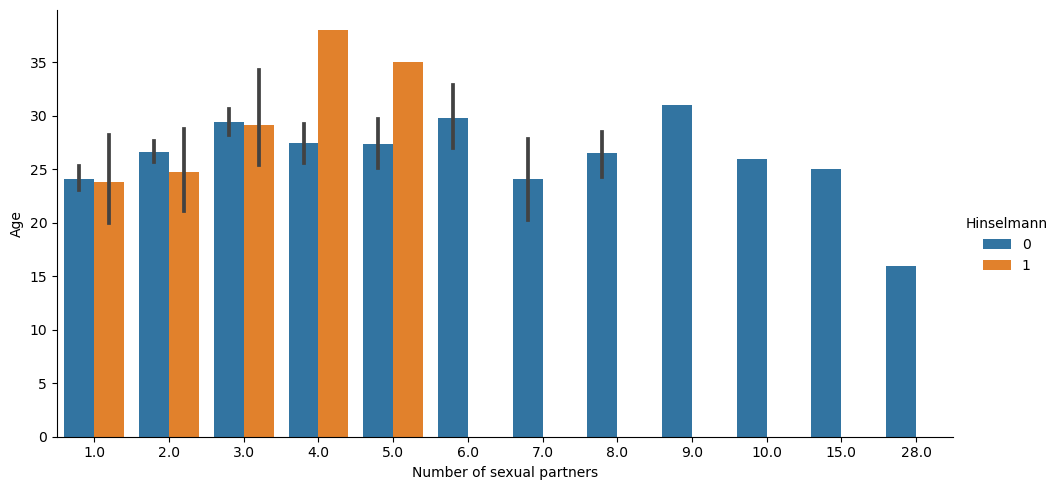

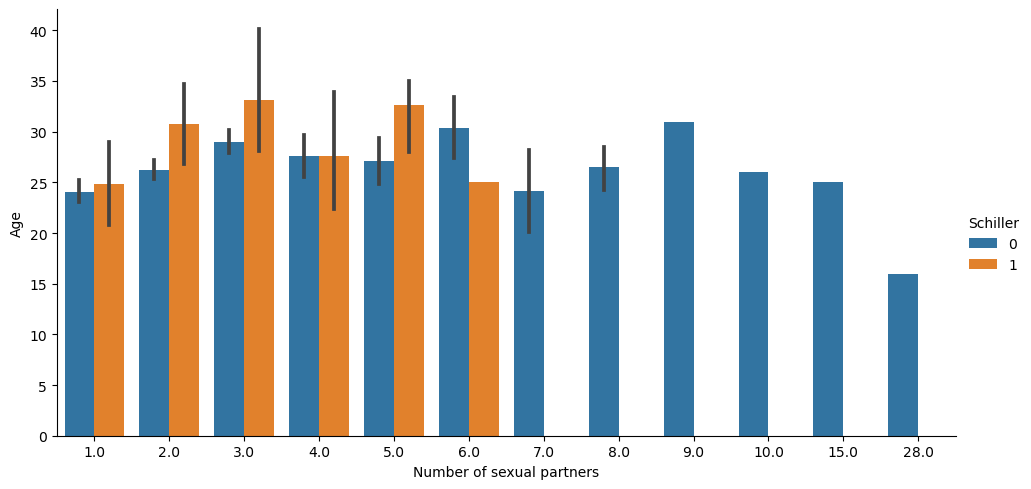

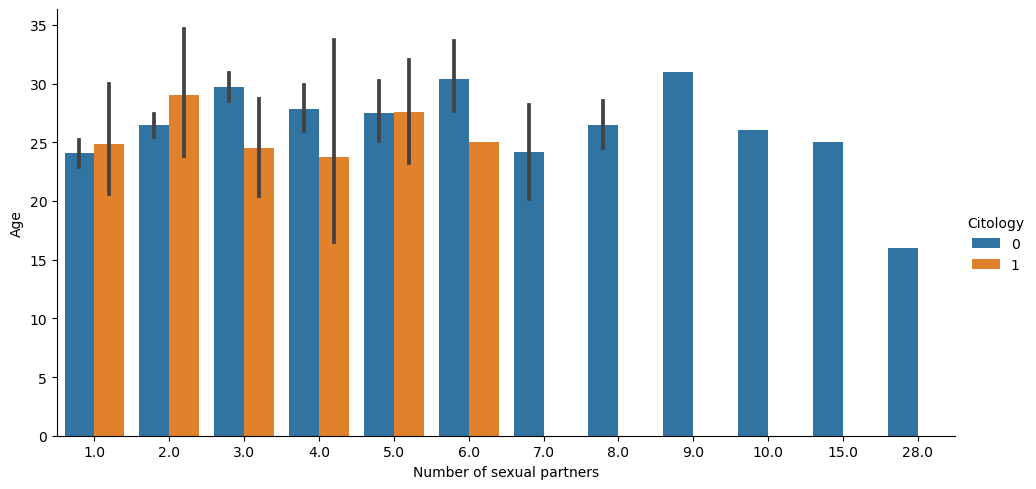

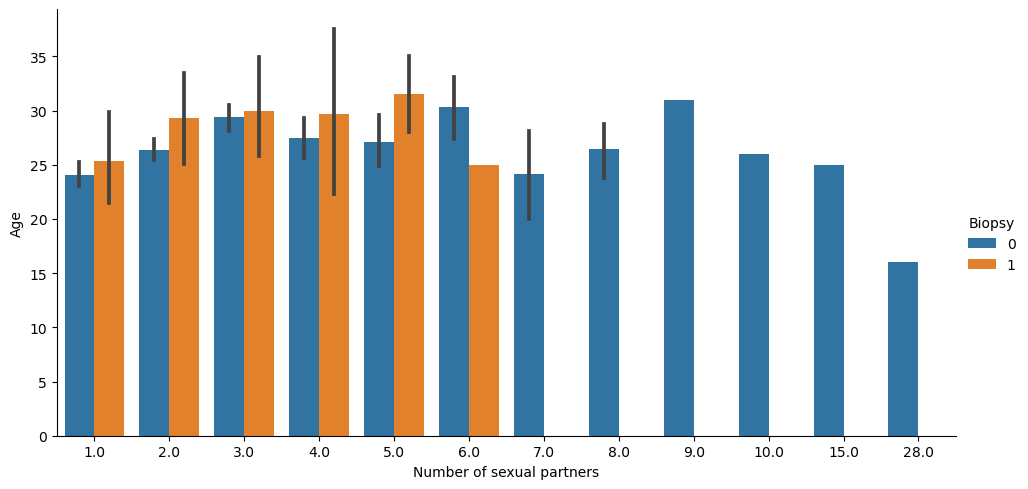

In [36]:
for feature in category_df:
  
  sns.catplot(x='Number of sexual partners',y='Age',hue=feature,data=cancer_df,aspect=1.95,kind='bar');

As age of women increases, the number of sexual partners increases which increases the possibility of getting tumor. So we can consider that Number of Sexual partners as a key feature in detecting the Cervical Cancer. Even the resources here: https://www.mayoclinic.org/diseases-conditions/cervical-cancer/symptoms-causes/syc-20352501 supports this statement.

C:\Users\sumit\AppData\Local\Temp\ipykernel_11704\64227434.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_values)


<Axes: xlabel='First sexual intercourse', ylabel='Density'>

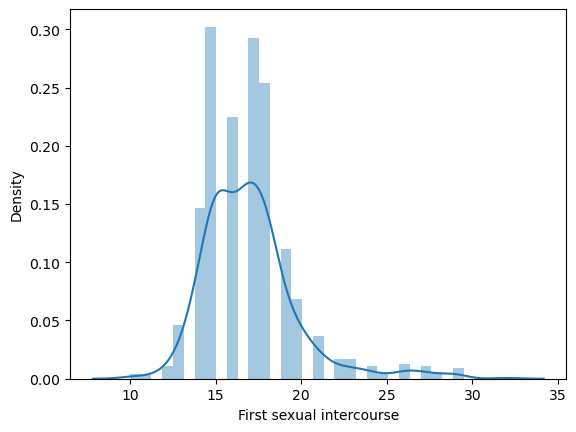

In [37]:
# sns.distplot(cancer_df['First sexual intercourse'].convert_objects(convert_numeric=True))
# #print('Mean age of the women who started the sexual intercourse',cancer_df['First sexual intercourse'].mean())
numeric_values = pd.to_numeric(cancer_df['First sexual intercourse'], errors='coerce')

# Plot the distribution
sns.distplot(numeric_values)

Dist plot gives an intuition that most of the women started first sexual intercourse between the age 15 to 20. 

C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.p

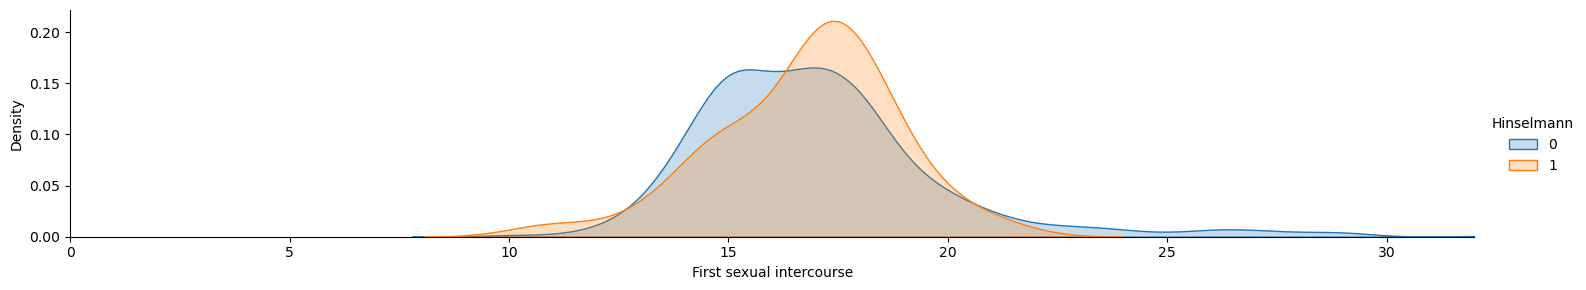

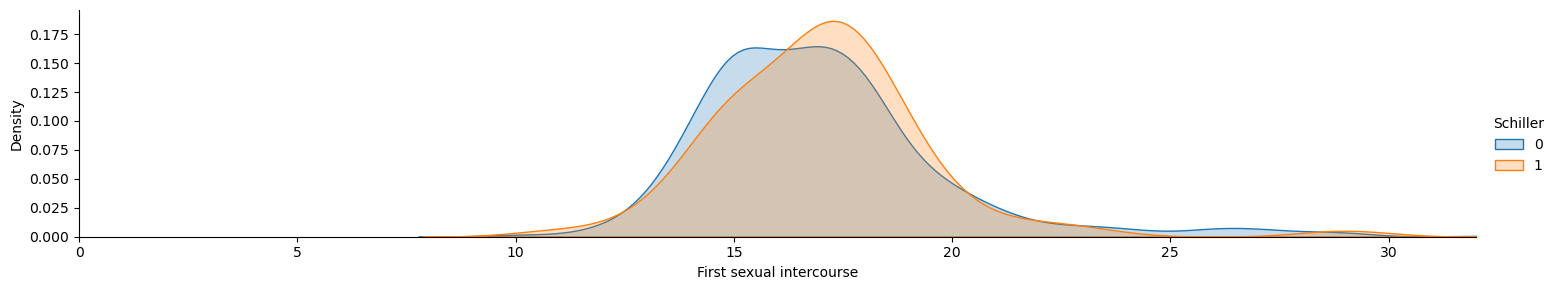

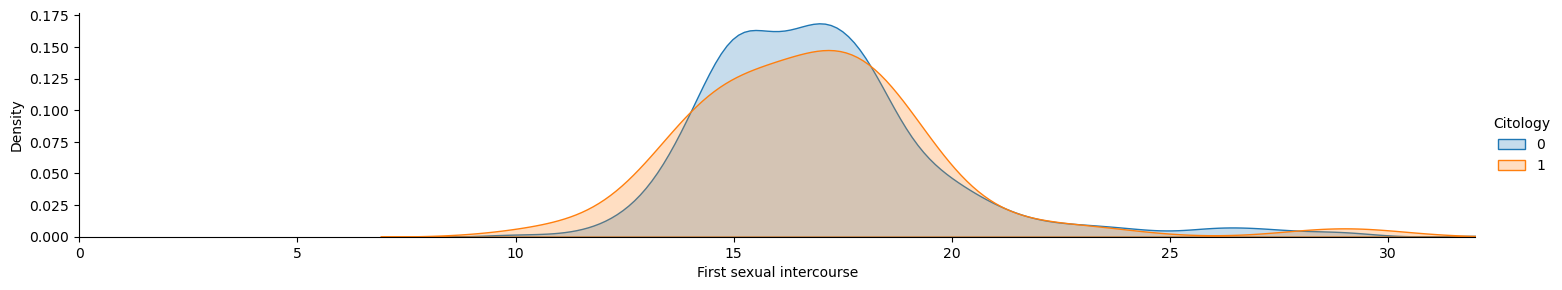

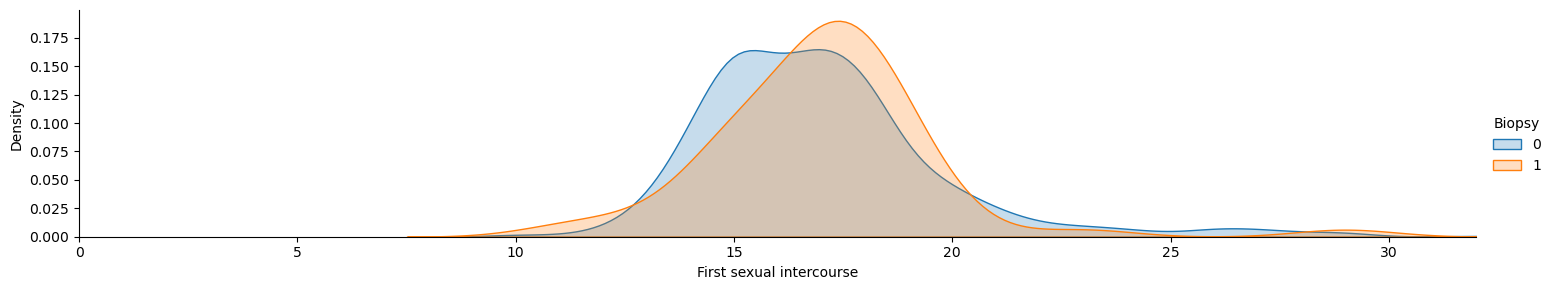

In [38]:

for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'First sexual intercourse',shade=True)

 oldest = cancer_df['First sexual intercourse'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

The density plots shows that the women who started the Sexual intercourse at the age of 15 to 20 are having the high chances of risk. Please refer to the resources here for supporting the statement: https://www.mayoclinic.org/diseases-conditions/cervical-cancer/symptoms-causes/syc-20352501 
So we can consider even this as the key feature in detecting the Cervical cancer.

In [39]:

# Create a DataFrame with the two columns of interest
subset_df = cancer_df[['Num of pregnancies', 'Number of sexual partners', 'Hinselmann']]

# Create a cross-tabulation
preg_table = pd.crosstab(index=subset_df['Hinselmann'], 
                         columns=[subset_df['Num of pregnancies'], subset_df['Number of sexual partners']])

print(preg_table)


Num of pregnancies        0.0              1.0                       ... 6.0   \
Number of sexual partners  1.0 2.0 3.0 4.0  1.0 2.0 3.0 4.0 5.0 6.0  ...  5.0   
Hinselmann                                                           ...        
0                            5   5   5   1   81  86  49  25  13   2  ...    1   
1                            0   0   0   0    4   1   2   0   0   0  ...    0   

Num of pregnancies            7.0              8.0      10.0 11.0  
Number of sexual partners 6.0  1.0 2.0 3.0 5.0  3.0 4.0  1.0  3.0  
Hinselmann                                                         
0                           1    1   3   1   1    1   1    1    1  
1                           0    0   0   0   0    0   0    0    0  

[2 rows x 58 columns]


<Axes: xlabel='Num of pregnancies-Number of sexual partners', ylabel='Hinselmann'>

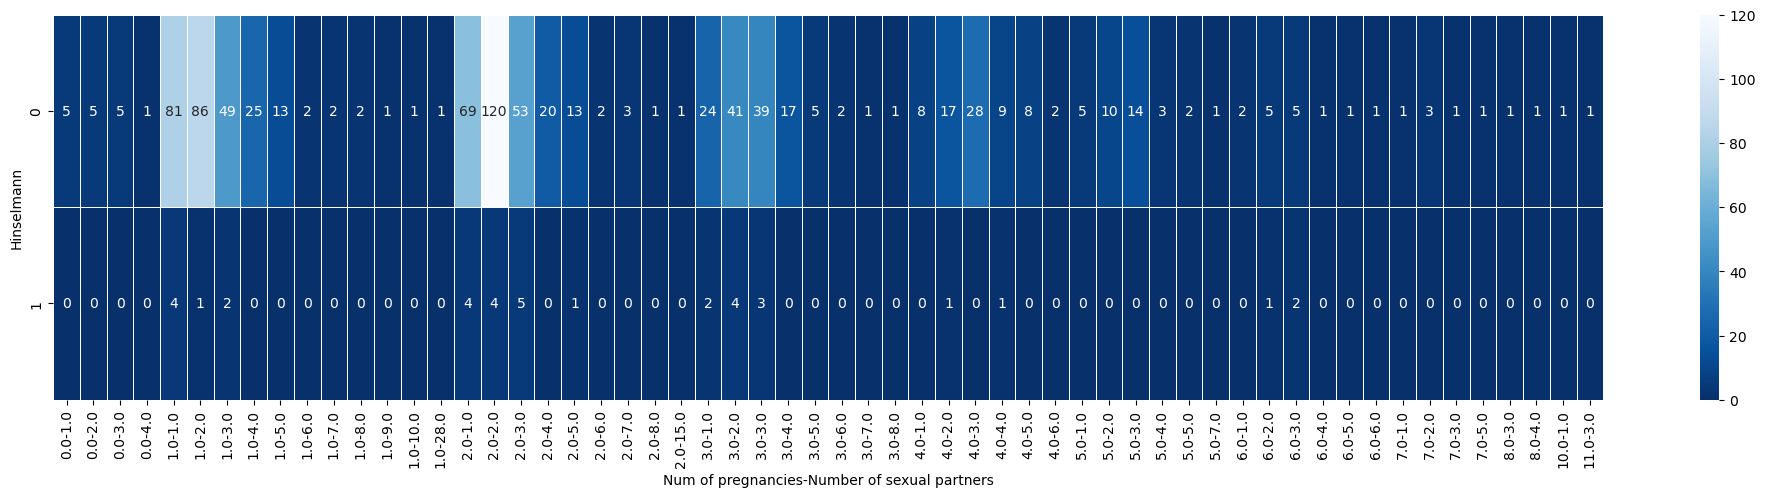

In [40]:
fig, ax = plt.subplots(figsize=(25,5))  
sns.heatmap(preg_table,annot=True, fmt="d",cmap="Blues_r",linewidths=0.5,ax=ax)

In [41]:
##### Just checking to see if there is any relation between number of pregnancies and number of sexual partners
cancer_df['Number of sexual partners'].corr(cancer_df['Num of pregnancies'])

0.07743921250933399

In [42]:

# cancer_df['Smokes (packs/year)'] = cancer_df['Smokes (packs/year)'].convert_objects(convert_numeric=True)
# print('Correlation between Smokes and Smokes (years) feature:',cancer_df['Smokes'].corr(cancer_df['Smokes (years)']))
# print('Correlation between Smokes and Smokes (packs/year) feature:',cancer_df['Smokes'].corr(cancer_df['Smokes (packs/year)']))
cancer_df['Smokes (packs/year)'] = pd.to_numeric(cancer_df['Smokes (packs/year)'], errors='coerce')
print('Correlation between Smokes and Smokes (years) feature:', cancer_df['Smokes'].corr(cancer_df['Smokes (years)']))
print('Correlation between Smokes and Smokes (packs/year) feature:', cancer_df['Smokes'].corr(cancer_df['Smokes (packs/year)']))


Correlation between Smokes and Smokes (years) feature: 0.6927983105817405
Correlation between Smokes and Smokes (packs/year) feature: 0.4735240622738945


From the three columns/features (Smokes, Smokes (years), Smokes (packs/year)) we can remove the column Smokes because Smokes (years) will represent the Smokes column because Smoke (years) column has non-zero value only when Smokes column has non-zero value. Also, the predictions depends on the number of years the person is smoking rather than just whether the smokes or not.

In [43]:
## removing the smokes column from the dataframe.

cancer_df.drop('Smokes',axis=1,inplace=True)

In [44]:
smokes_table = pd.crosstab(index=cancer_df["Schiller"], 
                          columns=(cancer_df["Smokes (years)"]))
#smokes_table.to_csv('smokes.csv',sep=',')

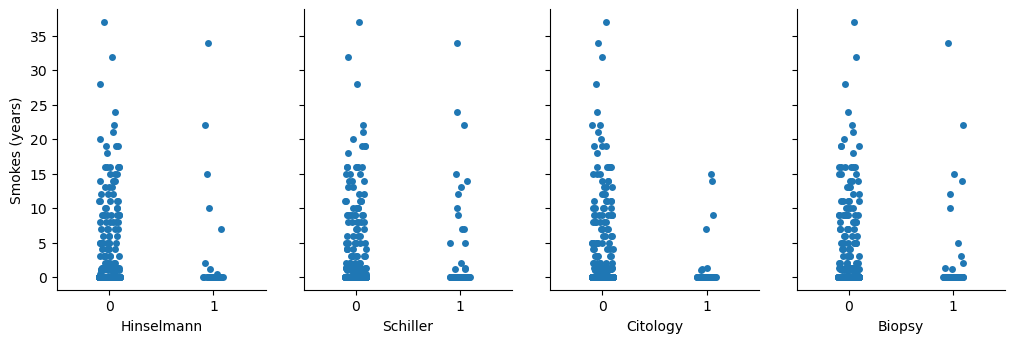

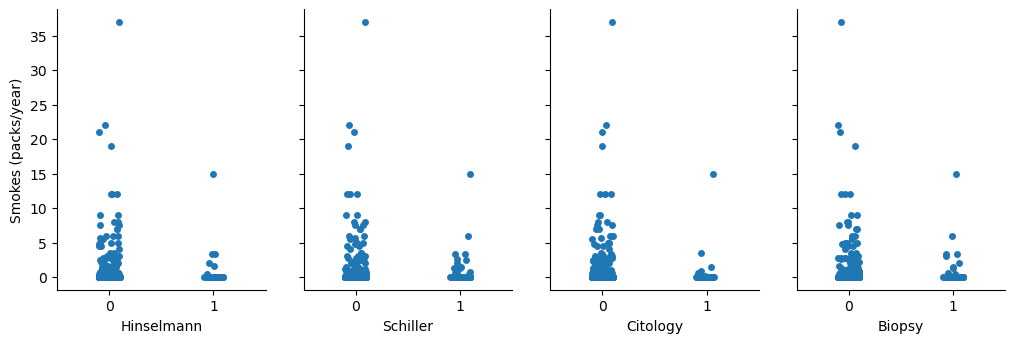

In [46]:
g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (years)'],
                 x_vars= category_df,
                 aspect=.75, height=3.5)
g.map(sns.stripplot, palette="winter");

g = sns.PairGrid(cancer_df,
                 y_vars=['Smokes (packs/year)'],
                 x_vars= category_df,
                 aspect=.75, height=3.5)
g.map(sns.stripplot, palette="spring");

Based on the distribution of data points in the scatter plot, the schiller and Biopsy tests are showing that women who are smoking for more than 5 years are having more chances of getting the tumor.

In [47]:
#### Similar study as Smokes can be conducted for other features like Harmonal Contraceptives etc.


cancer_df.drop('Hormonal Contraceptives',axis=1,inplace=True)

In [48]:
harmones_table = pd.crosstab(index=cancer_df["Schiller"], 
                          columns=(cancer_df["Hormonal Contraceptives (years)"]))
#harmones_table.to_csv('harmones.csv',sep=',')

C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.p

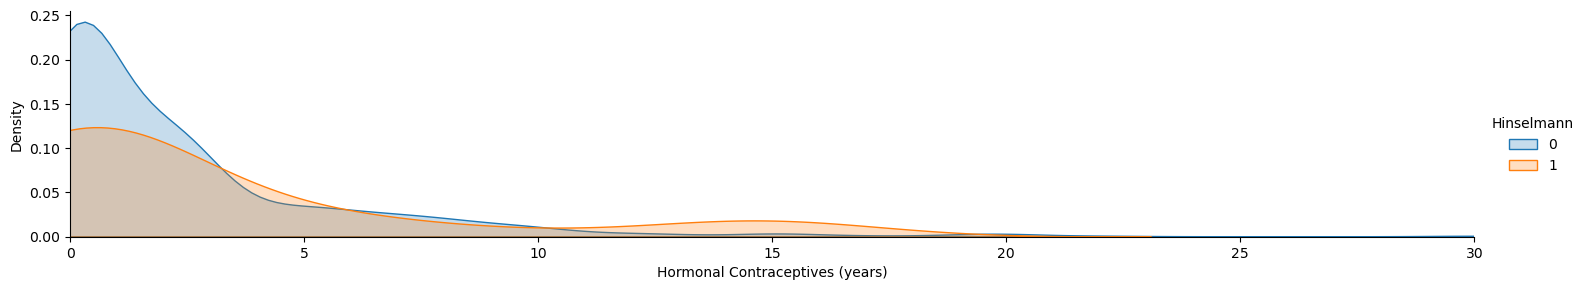

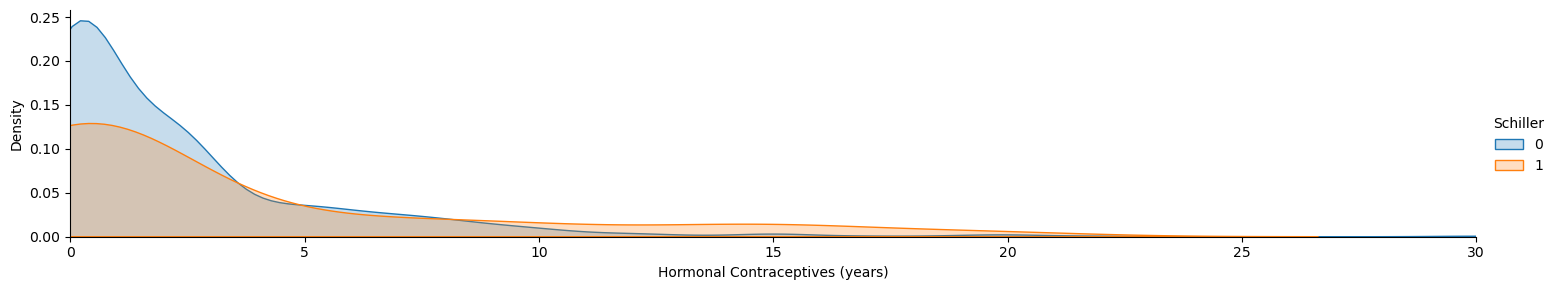

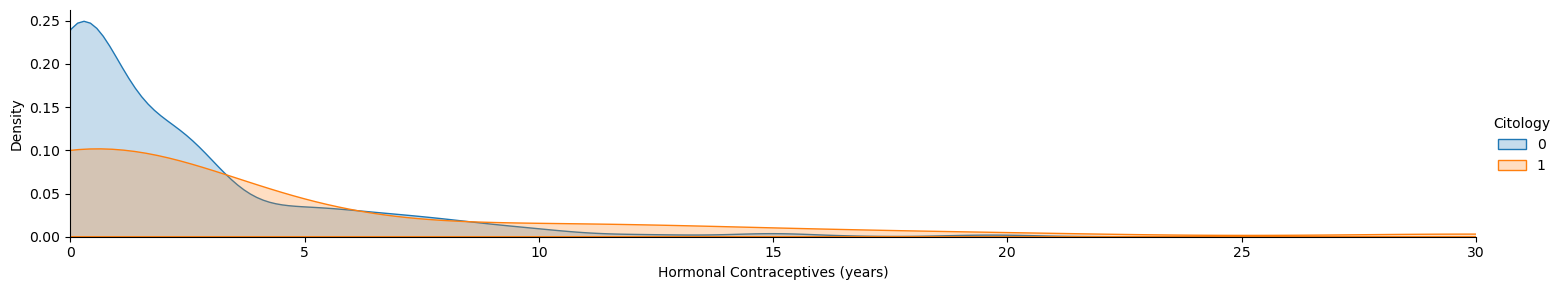

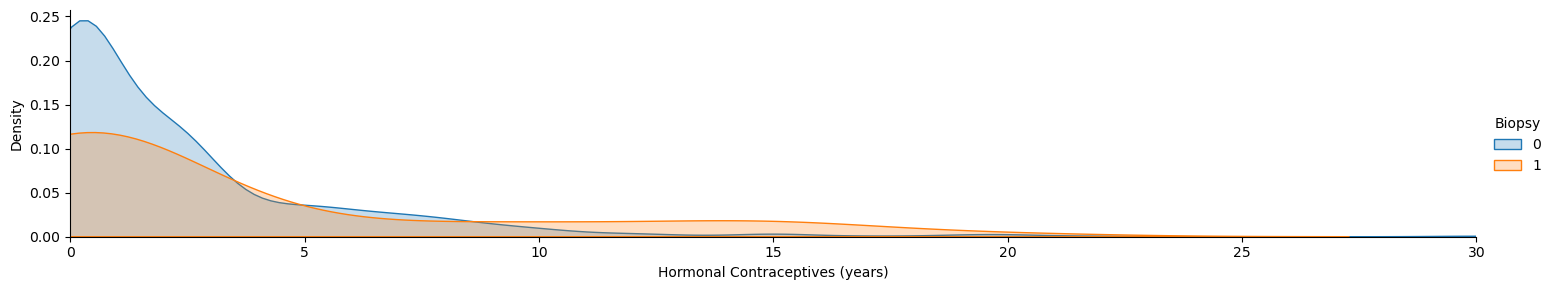

In [49]:
for feature in category_df:

 as_fig = sns.FacetGrid(cancer_df,hue=feature,aspect=5)

 as_fig.map(sns.kdeplot,'Hormonal Contraceptives (years)',shade=True)

 oldest = cancer_df['Hormonal Contraceptives (years)'].max()

 as_fig.set(xlim=(0,oldest))

 as_fig.add_legend()

Women who have taken the harmonal contraceptives for more than five years have the higher risk of cervical cancer. The small peaks at the age 10 & 15 shows even higher risk than women who have not used the contraceptives. The resources here: https://www.cancer.gov/about-cancer/causes-prevention/risk/hormones/oral-contraceptives-fact-sheet#q6 shows the studies supporting the statement that women face higher risk of cervical cancer if they used harmonal contraceptives. So, we can consider that this feature has the high correlation and should be used in furthur analysis.

In [63]:
# ### Dropping IUD column because IUD (years) has a non-zero value only if IUD is non-zero.

# # cancer_df.drop('IUD',axis=1,inplace=True)
# cancer_df.drop('IUD', axis=1, inplace=True)
# # print(cancer_df.columns)
# # column_name = 'IUD'
# # cancer_df.drop(column_name.strip(), axis=1, inplace=True)


C:\Users\sumit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


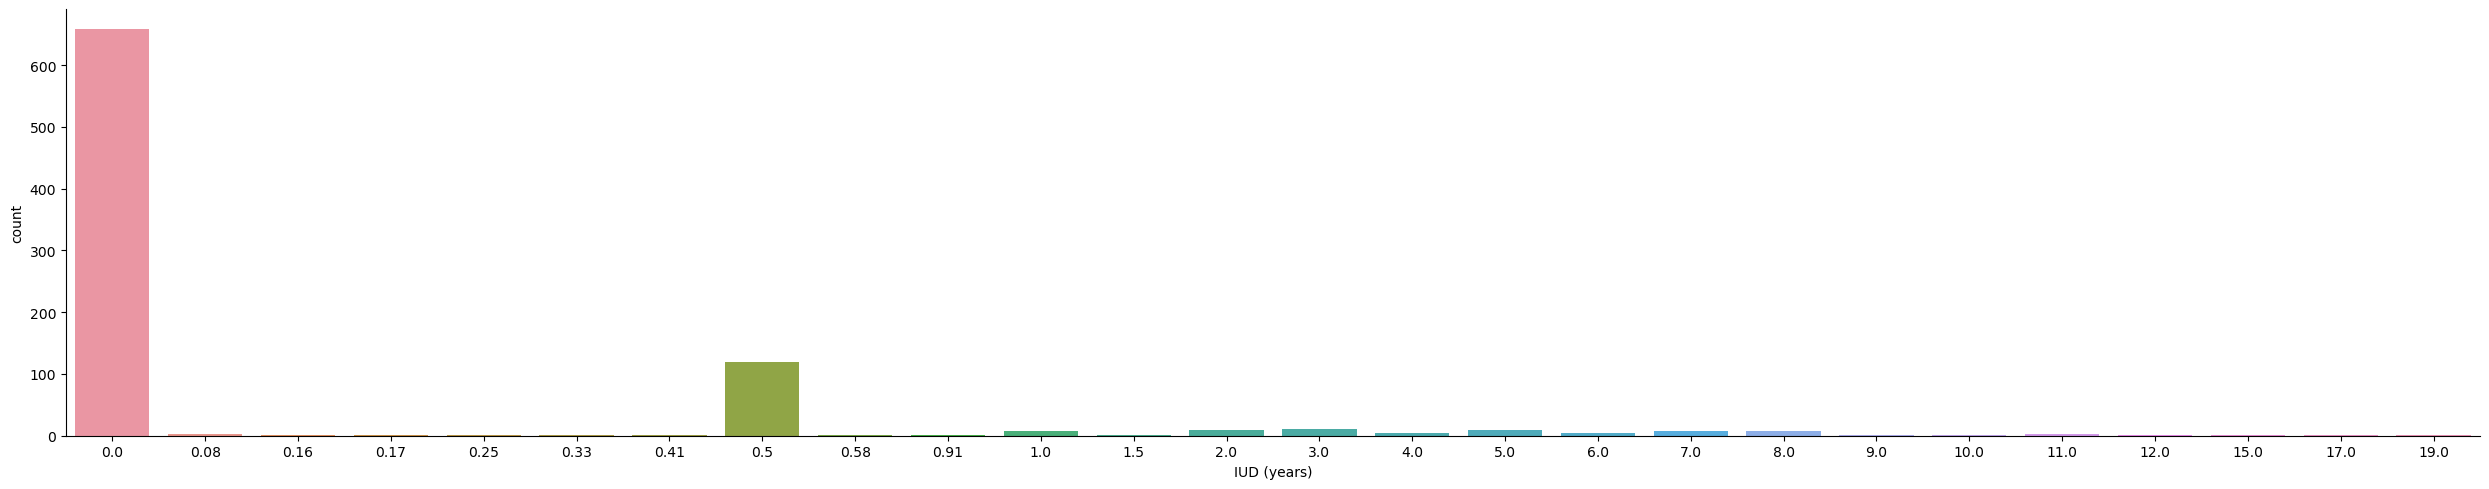

In [64]:

sns.catplot(x='IUD (years)',data=cancer_df,kind='count',aspect=5)

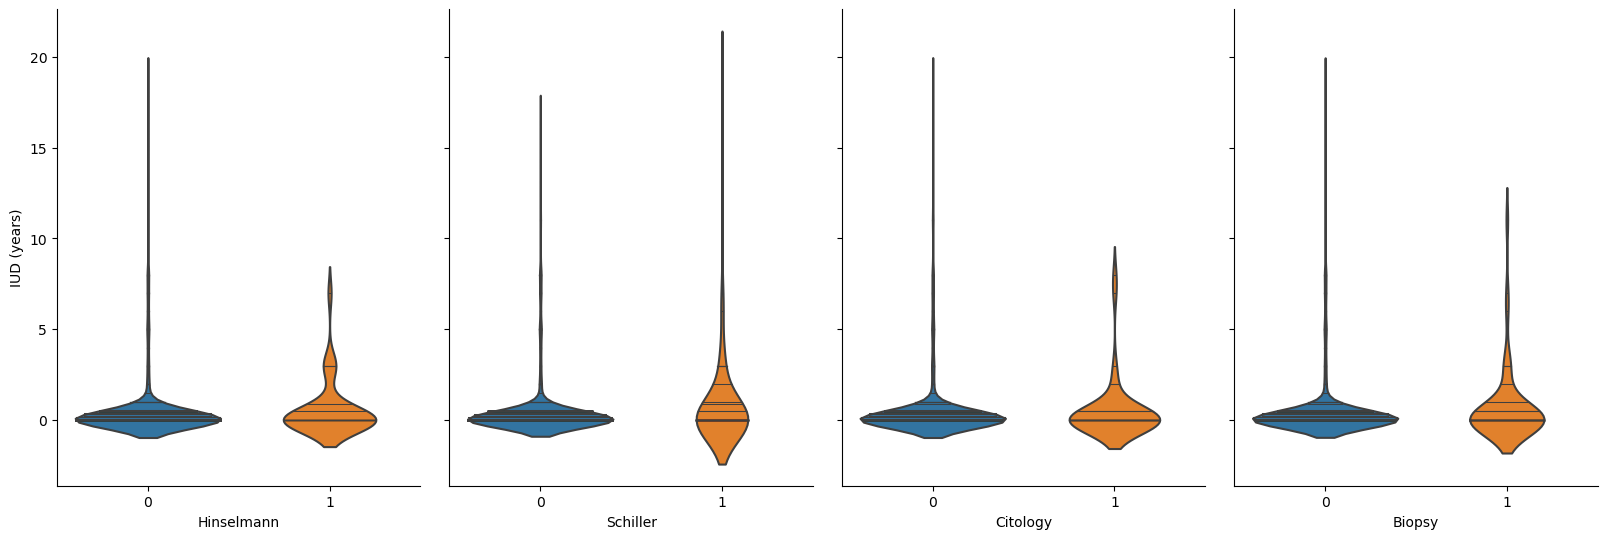

In [69]:
g = sns.PairGrid(cancer_df,
                 y_vars=['IUD (years)'],
                 x_vars= category_df,
                 aspect=.75, height=5.5)
g.map(sns.violinplot, palette="Accent",inner='stick');

The distribution of zero(negative test result) shows that the IUD used for any number of years has less chance of facing risk of cancer. Latest studies says that Women Who Use IUDs May Have Lower Risk of Cervical Cancer. Resource: https://www.livescience.com/60881-iuds-may-lower-risk-of-cervical-cancer.html. So does the presence of IUD feature makes any difference in prediction? lets see!!

In [70]:
HU_table = pd.crosstab(index=cancer_df["Biopsy"], 
                          columns=(cancer_df["IUD (years)"]))

#HU_table.to_csv('IUD.csv',sep=',')

In [76]:
# cancer_df['STDs (number)'] = round(cancer_df['STDs (number)'].convert_objects(convert_numeric=True))
# sns.countplot('STDs (number)',data=cancer_df)

#cancer_df['STDs (number)'] = pd.to_numeric(cancer_df['STDs (number)'], errors='coerce')
#sns.countplot('STDs (number)', data=cancer_df)



<Axes: xlabel='Hinselmann', ylabel='STDs (number)'>

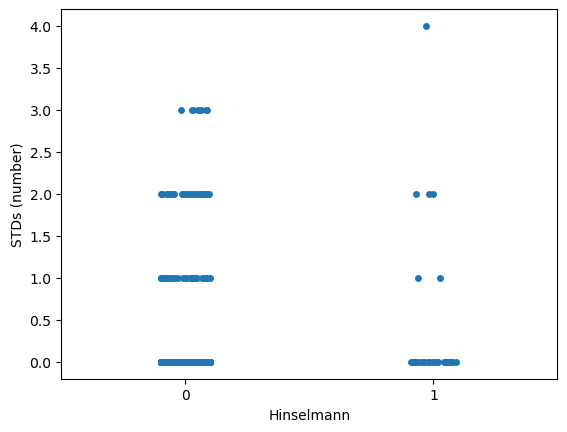

In [77]:
sns.stripplot(x='Hinselmann',y='STDs (number)',data=cancer_df)

In [78]:
std_table = pd.crosstab(index=cancer_df["Hinselmann"], 
                          columns=cancer_df["STDs (number)"])

std_table

STDs (number),0.0,1.0,2.0,3.0,4.0
Hinselmann,,,,,
0,750,32,34,7,0
1,29,2,3,0,1


<Axes: xlabel='STDs (number)', ylabel='Hinselmann'>

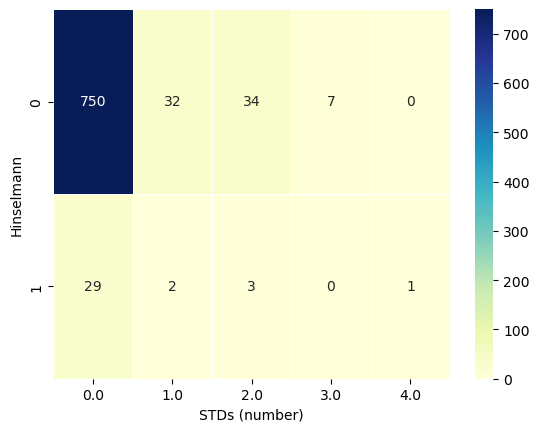

In [79]:
sns.heatmap(std_table,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

In [80]:
std_table_cit = pd.crosstab(index=cancer_df["Citology"], 
                          columns=cancer_df["STDs (number)"])

std_table_sch = pd.crosstab(index=cancer_df["Schiller"], 
                          columns=cancer_df["STDs (number)"])
std_table_bio = pd.crosstab(index=cancer_df["Biopsy"], 
                          columns=cancer_df["STDs (number)"])

<Axes: xlabel='STDs (number)', ylabel='Citology'>

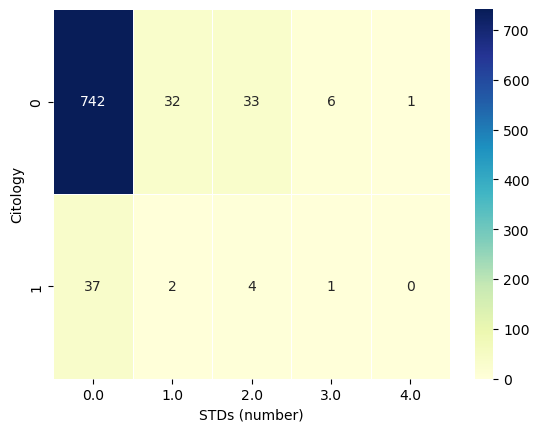

In [81]:
sns.heatmap(std_table_cit,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

<Axes: xlabel='STDs (number)', ylabel='Schiller'>

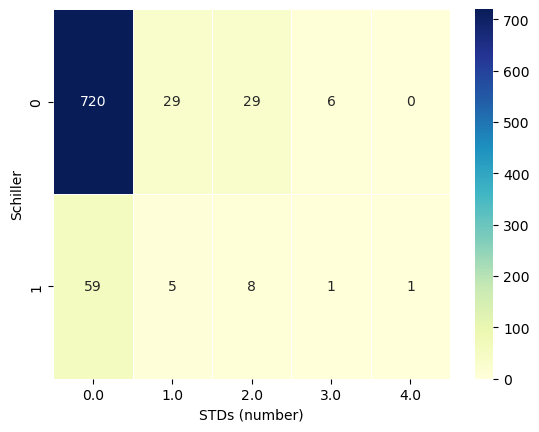

In [82]:
sns.heatmap(std_table_sch,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

<Axes: xlabel='STDs (number)', ylabel='Biopsy'>

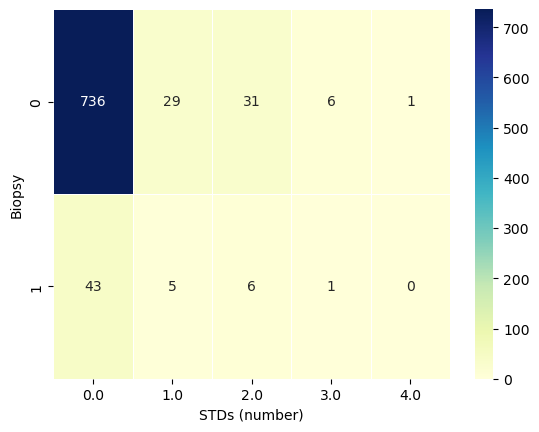

In [83]:
sns.heatmap(std_table_bio,annot=True, fmt="d",cmap="YlGnBu",linewidths=0.5)

In [84]:
cancer_df.drop('Dx',axis=1,inplace=True)

In [85]:
cancer_df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Hinselmann', 'Schiller', 'Citology',
       'Biopsy'],
      dtype='object')

 Starting to build the Machine Learning model with the final features: 'Age', 'Number of sexual partners', 'First sexual intercourse',
 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)',
'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis','STDs:vaginal condylomatosis', 
'STDs:vulvo-perineal condylomatosis','STDs:syphilis', 'STDs:pelvic inflammatory disease','STDs:genital herpes',
'STDs:molluscum contagiosum', 'STDs:AIDS','STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',



In [86]:
cancer_df_features = cancer_df.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)
cancer_df_label = pd.DataFrame(data=cancer_df['Hinselmann'])

In [87]:
cancer_df_label['Schiller'] = cancer_df['Schiller']
cancer_df_label['Citology'] = cancer_df['Citology']
cancer_df_label['Biopsy'] = cancer_df['Biopsy']

In [88]:
def cervical_cancer(cancer_label):
    
    hil, sch, cit, bio = cancer_label
    
    return hil+sch+cit+bio

cancer_df_label['cervical_cancer'] = cancer_df_label[['Hinselmann', 'Schiller', 'Citology','Biopsy']].apply(cervical_cancer,axis=1)

In [89]:
cancer_df_label.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)
print('Value counts of each target variable:',cancer_df_label['cervical_cancer'].value_counts())
cancer_df_label = cancer_df_label.astype(int)
cancer_df_label = cancer_df_label.values.ravel()

print('Final feature vector shape:',cancer_df_features.shape)
print('Final target vector shape',cancer_df_label.shape)


Value counts of each target variable: cervical_cancer
0    756
1     41
3     33
2     22
4      6
Name: count, dtype: int64
Final feature vector shape: (858, 27)
Final target vector shape (858,)


In [91]:
baseline_df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [92]:
baseline_df['cervical_cancer'] = cancer_df_label

In [93]:
baseline_df = baseline_df.replace('?', np.NaN)

In [94]:
# for feature in numerical_df:
#     print(feature,'',baseline_df[feature].convert_objects(convert_numeric=True).mean())
#     feature_mean = round(baseline_df[feature].convert_objects(convert_numeric=True).mean(),1)
#     baseline_df[feature] = baseline_df[feature].fillna(feature_mean)
for feature in numerical_df:
    print(feature, '', pd.to_numeric(baseline_df[feature], errors='coerce').mean())
    feature_mean = round(pd.to_numeric(baseline_df[feature], errors='coerce').mean(), 1)
    baseline_df[feature] = pd.to_numeric(baseline_df[feature], errors='coerce').fillna(feature_mean)

    


Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.219721412585799
Smokes (packs/year)  0.4531439506492308
Hormonal Contraceptives (years)  2.2564192013893334
IUD (years)  0.5148043184885289
STDs (number)  0.17662682602921648


In [1]:
# for feature in categorical_df:
    
#     baseline_df[feature] = baseline_df[feature].convert_objects(convert_numeric=True).fillna(1.0)
# for feature in categorical_df:
#     baseline_df[feature] = pd.to_numeric(baseline_df[feature], errors='coerce').fillna(1.0)
for feature in categorical_df:
    baseline_df[feature] = pd.to_numeric(baseline_df[feature], errors='coerce').fillna(1.0)



NameError: name 'categorical_df' is not defined

In [96]:
baseline_df.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)

In [97]:
baseline_df_features = baseline_df.drop(['cervical_cancer','STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)
baseline_df_labels = baseline_df['cervical_cancer']

In [98]:
print(baseline_df_features.shape)
print(baseline_df_labels.shape)
#print(baseline_df_features)

(858, 30)
(858,)


In [104]:
### Building a model for future predictions:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features=None, max_leaf_nodes=None,
                          min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10, 
                          oob_score=False, random_state=None, verbose=0,warm_start=False)

random_forest_model.fit(cancer_df_features,cancer_df_label)


RandomForestClassifier(max_features=None, n_estimators=10, n_jobs=4)

In [105]:
### Predictions made on the training data:

# print('Data Seen in training:',random_forest_model.predict(np.array([[51,3,17,6,34,3.4,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))
# print('Data seen in training:',random_forest_model.predict(np.array([[38,2,15,2,0,0,0.5,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))
# print(random_forest_model.feature_names_in_)
feature_importances = random_forest_model.feature_importances_
feature_names = cancer_df.columns[:-1]  # Assuming the last column is the target variable
sorted_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features:
    print(f"{feature}: {importance}")



Age: 0.20087012210063526
First sexual intercourse: 0.16395183589183332
Hormonal Contraceptives (years): 0.16224275870476124
Number of sexual partners: 0.1004490795112237
Num of pregnancies: 0.08346445416849903
Smokes (packs/year): 0.05122530681408123
Smokes (years): 0.04829405609126711
IUD (years): 0.047649269208326336
STDs (number): 0.02342621512764642
STDs: Number of diagnosis: 0.02059258036936214
Dx:CIN: 0.016438097946923906
Dx:HPV: 0.013855352282993843
IUD: 0.013255469802466047
STDs:genital herpes: 0.011595768194625797
Dx:Cancer: 0.010165420887969342
STDs:HIV: 0.006574683859767477
STDs:condylomatosis: 0.0062119559817330585
STDs:vulvo-perineal condylomatosis: 0.004061618774436913
STDs:pelvic inflammatory disease: 0.0039551610807172025
STDs:molluscum contagiosum: 0.002692602953023102
STDs:HPV: 0.0023959669833849553
STDs:vaginal condylomatosis: 0.001876640095897207
STDs:syphilis: 0.0016406168128637883
STDs: 0.0016086689099549477
STDs:cervical condylomatosis: 0.0015062974456066043
STDs

In [106]:
### Women with an age of 19, Number of sexual partners:1,First sexual intercourse:17,Num of pregnancies:1,Smokes (years):1, Smokes (packs/year):3.4, 
### Hormonal Contraceptives (years): 0 and all the other features are 0

# print('Testing the model on women with age less than 20:',random_forest_model.predict(np.array([[19,1,17,1,1,3.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))
print(np.array([[19,1,17,1,1,3.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).shape)


(1, 26)


In [107]:
### Women with an age of 35, Number of sexual partners:5,First sexual intercourse:11,Num of pregnancies:2,Smokes (years):15, Smokes (packs/year):15, 
### Hormonal Contraceptives (years): 0 and all the other features are 0
# print('Testing the model',random_forest_model.predict(np.array([[35,5,11,2,15,15,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))
print(np.array([[35,5,11,2,15,15,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).shape)



(1, 26)
